# Аналитика в авиакомпании

Выгрузка и подготовка данных была проведена с помощью SQL.
Необходимо проверить гипотезу о различии среднего спроса на билеты во время различных событий.

## Шаг 4. Аналитика средствами Python

In [1]:
# импорт библиотек 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

### Таблица с данными о модели самолета и количестве рейсов для каждой модели самолетов model в сентябре 2018 года

In [2]:
flights_model = pd.read_csv('/datasets/query_1.csv') # чтение файла с данными
flights_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
flights_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Таблица содержит 8 строк и 2 столбца: model — модели самолета, flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года. Типы данных корректны, пропусков и дубликатов нет.

Рассмотрим данные графически.

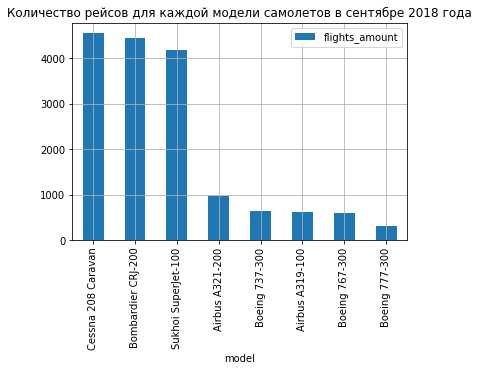

In [4]:
flights_model.sort_values(by='flights_amount',ascending=False).plot(kind='bar',x='model',y='flights_amount',grid=True)
plt.title('Количество рейсов для каждой модели самолетов в сентябре 2018 года')
plt.show()

Наибольшее количество рейсов приходится на модели самолетов Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100, на каждую модель более 4100 рейсов. На моделях Airbus и Boeing количество рейсов значительно меньше, не более 1000 на каждую модель. Airbus и Boeing менее востребованы у пассажиров.

### Таблица с данными о городах и среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

In [5]:
flights_city = pd.read_csv('/datasets/query_3.csv') # чтение файла с данными
flights_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
flights_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Таблица содержит 101 строку и 2 столбца: city — город, average_flights — среднее количество рейсов, прибывающих в город city за день в сентябре 2018 года. Типы данных корректны, пропусков и дубликатов нет.

Рассмотрим данные графически.

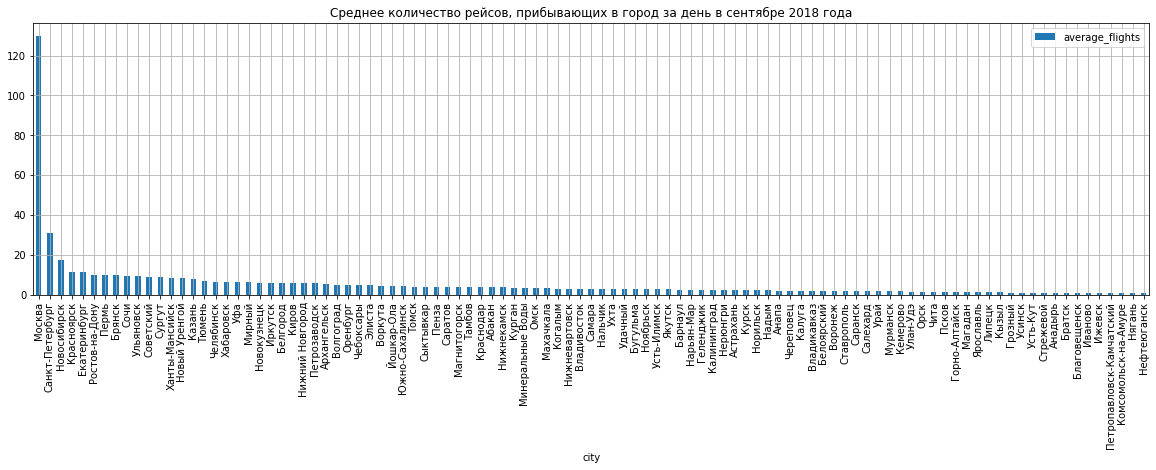

In [7]:
flights_city.sort_values(by='average_flights',ascending=False).plot(kind='bar',
                                                                             x='city',y='average_flights',
                                                                             grid=True,
                                                                            figsize=(20,5))
plt.title('Среднее количество рейсов, прибывающих в город за день в сентябре 2018 года')
plt.show()

Выделим топ-10 городов по максимальному количеству рейов.

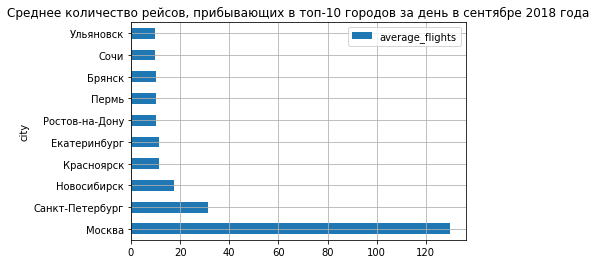

In [8]:
flights_city.sort_values(by='average_flights',ascending=False).head(10).plot(kind='barh',x='city',y='average_flights',grid=True)
plt.title('Среднее количество рейсов, прибывающих в топ-10 городов за день в сентябре 2018 года')
plt.show()

В топ-10 городов по количеству рейсов, прибывающих за день, оказались Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, РОстов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.
В явной тройке лидеров по количеству рейсов, прибывающих за день: Москва, Санкт-Петербург и Новосибирск. В остальные города России люди прилетают заметно реже.

## Шаг 5. Проверка гипотезы средствами Python

In [9]:
tickets_week = pd.read_csv('/datasets/query_last.csv') # чтение файла с данными
tickets_week.to_csv('query_last.csv')
tickets_week

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [10]:
tickets_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


Таблица содержит 10 строк и 4 столбца: week_number — номер недели; ticket_amount — количество проданных билетов за неделю; festival_week — есть ли на этой неделе фестиваль; festival_name — название фестиваля.
В таблице есть пропуски, но все они объянимы: данные пропущены в столбцах festival_week и festival_name, если за неделю week_number не было фестиваля. Типы данных корректны. Так как столбец festival_week имеет пропуски, то нельзя заменить тип данных на int.

### Проверка гипотезы: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Рассмотрим общие данные о спросе на билеты во время фестивалей и в обычное время. Создадим две таблицы.

In [11]:
## Таблица данных во время фестиваля
tickets_festival_week = tickets_week[~tickets_week.festival_week.isna()]
tickets_festival_week

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


In [12]:
## Таблица данных в обычное время
tickets_no_festival_week = tickets_week[tickets_week.festival_week.isna()]
tickets_no_festival_week

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Найдем значение среднего спроса на билеты во время фестивалей и спроса на билеты в обычное время.

In [13]:
print('Во время фестивальных недель')
print('Среднее = {:.2f}'.format(tickets_festival_week['ticket_amount'].mean()))
print('Медиана =',tickets_festival_week['ticket_amount'].median())
print()
print('Во время нефестивальных недель')
print('Среднее = {:.2f}'.format(tickets_no_festival_week['ticket_amount'].mean()))
print('Медиана =',tickets_no_festival_week['ticket_amount'].median())

Во время фестивальных недель
Среднее = 48662.67
Медиана = 51034.0

Во время нефестивальных недель
Среднее = 51530.86
Медиана = 51518.0


Заметим, что средние и медианы пракически совпадают. Чтобы понять, совпадают ли средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время, недостаточно просто сравнить числа. Без проведения корректного теста нельзя считать совпадение случайным или закономерным. Вместо расчёта и сравнения самих средних, используются сами датасеты для проведения статистического теста.

Нулевая гипотеза H₀ всегда формулируется так, чтобы использовать знак равенства. Если выясняем, есть ли разница между совокупностями, то нулевая гипотеза будет такая: «нет, разницы нет, то есть исследуемые параметры равны». Cформулируем нулевую гипотезу H₀: средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время равны. Исходя из H₀ формулируется альтернативная гипотеза H₁: средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время отличаются.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind (array1, array2, equal_var) . Методу передают параметры: • array1, array2 — массивы, содержащие выборки; • equal_var («равная дисперсия») — необязательный параметр, задающий считать ли равными дисперсии выборок. В нашем случае полагаем, что выборки взяты из схожих по параметрам совокупностей, значит equal_var = True (это значение стоит по умолчанию в методе).


In [14]:
print('Дисперсия во время фестивалей =',np.var(tickets_festival_week['ticket_amount'], ddof=1))
print('Дисперсия в обычные дни =',np.var(tickets_no_festival_week['ticket_amount'], ddof=1))

Дисперсия во время фестивалей = 19497697.333333332
Дисперсия в обычные дни = 17143.476190476194


Дисперсии сильно отличаются, поэтому equal_var=False.

In [15]:
alpha = 0.05 # критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(tickets_festival_week['ticket_amount'],tickets_no_festival_week['ticket_amount'],equal_var=False)
   
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


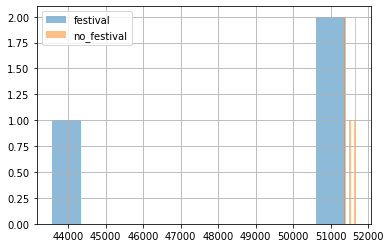

In [16]:
tickets_festival_week['ticket_amount'].hist(alpha=0.5,label='festival')
tickets_no_festival_week['ticket_amount'].hist(alpha=0.5,label='no_festival')
plt.legend()
plt.show()

Не получилось отвергнуть нулевую гипотезу, что средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время равны. Нельзя сделать вывод о значимом различии между средними спросами.

В задаче применили t-тест, хотя количество наблюдений очень мало и нельзя с уверенностью сказать, что данные распределены нормально. График гистограмм подтверждает это.

## Общий вывод

Из открытого источника в интернете были собраны данные о 11 крупнейших фестивалях 2018 года. Спарсировали данные с сайта  и провели предварительный анализ. Было найдено количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года, а также посчитано среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Для каждой недели с 23 июля по 30 сентября 2018 года подсчитали количество билетов, купленных на рейсы в Москву и добавлена информация о том, проходил ли в эту неделю фестиваль.

Наибольшее количество рейсов приходится на модели самолетов Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100, на каждую модель более 4100 рейсов. На моделях Airbus и Boeing количество рейсов значительно меньше, не более 1000 на каждую модель. Airbus и Boeing менее востребованы у пассажиров.

В топ-10 городов по количеству рейсов, прибывающих за день, оказались Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, РОстов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.
В явной тройке лидеров по количеству рейсов, прибывающих за день: Москва, Санкт-Петербург и Новосибирск. В остальные города России люди прилетают заметно реже.

Далее проанализировали спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. Выяснили, что средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время не имеет значимых различий. Т.е. фестивали не влияют на поток пассажиров в данный город.